In [55]:
import cfusdlog
import matplotlib.pyplot as plt
import matplotlib
import re
import argparse

filename = '/home/mht/csw_ws/Notes/sim_to_real_exp/exp_notes/0209/log03'

# decode binary log data
logData = cfusdlog.decode(filename)

#only focus on regular logging
logData = logData['fixedFrequency']
logData.keys()
logData['timestamp'] = (logData['timestamp'] - logData['timestamp'].min())  / 1000

(2.0, 4.0)

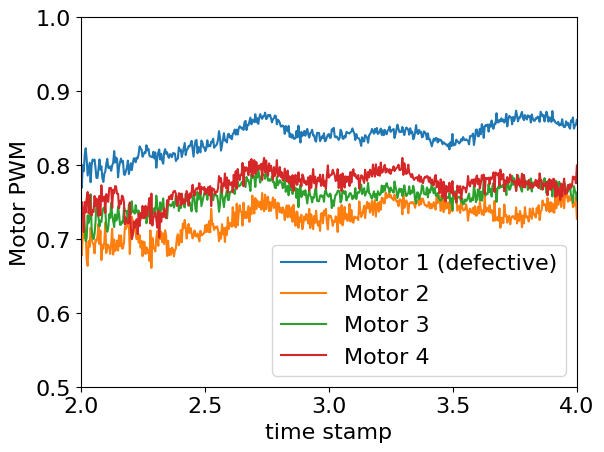

In [62]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
plt.plot(logData['timestamp'], logData['motor.m1req'] / 65535, label = 'Motor 1 (defective)')
plt.plot(logData['timestamp'], logData['motor.m2req'] / 65535, label = 'Motor 2')
plt.plot(logData['timestamp'], logData['motor.m3req'] / 65535, label = 'Motor 3')
plt.plot(logData['timestamp'], logData['motor.m4req'] / 65535, label = 'Motor 4')
# plt.plot(logData['timestamp'], logData['ctrltargetZ.z'] / 1000, label = 'target')
plt.legend()
plt.ylabel('Motor PWM')
plt.xlabel('time stamp')
plt.ylim([0.5, 1.0])
plt.xlim([2, 4])

In [45]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))